In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#### import tensorflow as tf
import os
import cv2
import numpy as np

# Définir le chemin vers le dataset
dataset_path = '/kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2'

# Chemins vers les sous-dossiers pour les jeux de données
paths = {
    'UCSDped1_Train': os.path.join(dataset_path, 'UCSDped1', 'Train'),
    'UCSDped1_Test': os.path.join(dataset_path, 'UCSDped1', 'Test'),
    'UCSDped2_Train': os.path.join(dataset_path, 'UCSDped2', 'Train'),
    'UCSDped2_Test': os.path.join(dataset_path, 'UCSDped2', 'Test')
}

In [3]:
# Fonction pour charger les chemins d'images depuis un dossier
def get_image_paths(folder_path):
    image_paths = []
    if not os.path.exists(folder_path):
        print(f"Chemin non trouvé : {folder_path}")
        return image_paths

    for subfolder in sorted(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):  # Vérifiez si c'est un dossier
            for filename in sorted(os.listdir(subfolder_path)):
                img_path = os.path.join(subfolder_path, filename)
                # Vérifie l'extension de fichier pour éviter les fichiers non image
                if img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif','tif')):
                    image_paths.append(img_path)
    return image_paths

# Récupérer tous les chemins d'images pour chaque dossier
train1_paths = get_image_paths(paths['UCSDped1_Train'])
test1_paths = get_image_paths(paths['UCSDped1_Test'])
train2_paths = get_image_paths(paths['UCSDped2_Train'])
test2_paths = get_image_paths(paths['UCSDped2_Test'])


In [4]:
from PIL import Image
import numpy as np

# Définir img_width et img_height si ce n'est pas encore fait
img_width = 128  # Remplacez par la largeur souhaitée
img_height = 128  # Remplacez par la hauteur souhaitée

def load_tif_image(file_path):
    print(f"Chargement de l'image : {file_path}")
    try:
        with Image.open(file_path) as img:
            img = img.convert("L")  # Convertir en niveaux de gris
            img = img.resize((img_width, img_height))  # Redimensionner
            img_array = np.array(img) / 255.0  # Normaliser
            return img_array
    except Exception as e:
        print(f"Erreur lors du chargement de l'image {file_path}: {e}")
        return None

In [5]:
# Fonction pour vérifier si un fichier est dans un dossier qui se termine par 'gt'
def is_gt_folder(image_path):
    # Extraire le dossier parent de l'image
    parent_folder = os.path.basename(os.path.dirname(image_path))
    
    # Vérifier si le nom du dossier parent se termine par 'gt'
    return parent_folder.endswith('gt')

In [6]:
# Chargez les images et filtrez celles qui sont None
train1_images = [load_tif_image(path) for path in train1_paths]
train1_images = [img for img in train1_images if img is not None]  # Filtrer les None

test1_images = [load_tif_image(path) for path in test1_paths if not is_gt_folder(path)]
test1_images = [img for img in test1_images if img is not None]  # Filtrer les None

Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/001.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/002.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/003.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/004.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/005.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/006.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/007.tif
Charge

PackBitsDecode: Not enough data for scanline 0.


Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/154.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/155.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/156.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/157.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/158.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/159.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test017/160.tif
Chargement de l'imag

In [7]:
# Chargez les images et filtrez celles qui sont None
train2_images = [load_tif_image(path) for path in train2_paths]
train2_images = [img for img in train1_images if img is not None]  # Filtrer les None

test2_images = [load_tif_image(path) for path in test2_paths if not is_gt_folder(path)]
test2_images = [img for img in test1_images if img is not None]  # Filtrer les None

Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/001.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/002.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/003.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/004.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/005.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/006.tif
Chargement de l'image : /kaggle/input/dataset-anomaly-detection/projet_deep_learing/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train001/007.tif
Charge

In [8]:
len(test1_images)

7199

In [9]:
# Combinez les ensembles d'images d'entraînement
all_train_images = train1_images + train2_images

# Combinez les ensembles d'images de test
all_test_images = test1_images + test2_images


In [10]:
def extract_anomaly_indices(m_file_path):
    """
    Fonction pour extraire les indices des anomalies à partir d'un fichier .m.

    :param m_file_path: Chemin vers le fichier .m
    :return: Liste des indices des anomalies
    """
    anomaly_indices = []

    try:
        with open(m_file_path, 'r') as file:
            content = file.readlines()

            # Parcourir chaque ligne pour extraire les indices
            for line in content:
                if 'gt_frame' in line:
                    # Extraire la plage d'indices, elle est dans le format [start:end] ou [start:end, start:end]
                    start_index = line.find('[') + 1
                    end_index = line.find(']')
                    if start_index != -1 and end_index != -1:
                        # Extraire et nettoyer la chaîne d'indices
                        frame_range = line[start_index:end_index].strip()

                        # Diviser les différentes plages d'indices si elles existent (séparées par une virgule)
                        ranges = frame_range.split(',')

                        # Liste pour stocker les indices extraits
                        indices = []

                        for r in ranges:
                            # Gérer la plage avec un format start:end
                            if ':' in r:
                                start, end = map(int, r.split(':'))
                                indices.extend(range(start, end + 1))  # Ajouter tous les indices dans la plage
                            else:
                                indices.append(int(r))  # Si c'est juste un indice, l'ajouter directement

                        # Ajouter les indices extraits à la liste principale
                        anomaly_indices.append(indices)

        return anomaly_indices

    except Exception as e:
        print(f"Erreur lors de l'ouverture du fichier : {e}")
        return []

# Chemins vers les fichiers .m
m_file_path_ped1 = os.path.join(paths['UCSDped1_Test'], 'UCSDped1.m')
m_file_path_ped2 = os.path.join(paths['UCSDped2_Test'], 'UCSDped2.m')

# Extraire les indices d'anomalies pour UCSDped1_Test et UCSDped2_Test
anomaly_indices_ped1 = extract_anomaly_indices(m_file_path_ped1)
anomaly_indices_ped2 = extract_anomaly_indices(m_file_path_ped2)




In [11]:
def adjust_indices_per_sublist(indices):
    """
    Fonction pour ajuster les indices par sous-liste en ajoutant 200 après chaque sous-liste.
    :param indices: Liste d'indices sous forme de sous-listes (par exemple, [60, 61, 62, ...] ou [(start, end)]).
    :return: Liste des indices ajustés.
    """
    adjusted_indices = []
    current_offset = 0  # Décalage initial des indices

    for sublist in indices:
        # Si les éléments de la sous-liste sont des tuples (start, end)
        if isinstance(sublist[0], tuple):
            for start, end in sublist:
                adjusted_sublist = list(range(start + current_offset, end + current_offset + 1))
                adjusted_indices.extend(adjusted_sublist)
        else:
            # Sinon, on applique simplement l'offset à chaque élément
            adjusted_sublist = [index + current_offset for index in sublist]
            adjusted_indices.extend(adjusted_sublist)

        # Augmenter le décalage de 200 après chaque sous-liste
        current_offset += 200

    return adjusted_indices


# Appliquez l'ajustement
adjusted_indices = adjust_indices_per_sublist(anomaly_indices_ped1)

# Affichez les indices ajustés
print(adjusted_indices)


[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,

In [12]:
import torch
from torch import nn

class Critic(nn.Module):
    '''
    Critic Class
    Values:
        im_chan: the number of channels in the images, fitted for the dataset used, a scalar
              (1 channel for black-and-white images)
        hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, im_chan=1, hidden_dim=64):
        super(Critic, self).__init__()
        self.crit = nn.Sequential(
            self.make_crit_block(im_chan, hidden_dim),
            self.make_crit_block(hidden_dim, hidden_dim * 2),
            self.make_crit_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_crit_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        '''
        Returns a sequence of operations corresponding to a critic block of DCGAN;
        a convolution, a batchnorm (except in the final layer), and an activation (except in the final layer).
        Parameters:
            input_channels: how many channels the input feature representation has
            output_channels: how many channels the output feature representation should have
            kernel_size: the size of each convolutional filter
            stride: the stride of the convolution
            final_layer: true if it is the final layer, false otherwise
        '''
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True),
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
            )

    def forward(self, image):
        '''
        Completes a forward pass of the critic: Given an image tensor,
        returns a 1-dimension tensor representing fake/real.
        Parameters:
            image: a flattened image tensor with dimension (im_chan)
        '''
        crit_pred = self.crit(image)
        return crit_pred.view(len(crit_pred), -1)


In [14]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chemin vers le modèle enregistré
model_path = '/kaggle/input/gan/keras/default/1/critic.pth'

# Charger le modèle (assurez-vous d'avoir défini votre modèle avant de charger les poids)
model = Critic()  # Remplacez par votre classe de modèle

# Charger les poids dans le modèle
model.load_state_dict(torch.load(model_path))

# Assurez-vous que le modèle est sur le bon appareil (GPU ou CPU)
model = model.to(device)  # Remplacez 'device' par 'cuda' ou 'cpu'



/tmp/ipykernel_30/2444627801.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [15]:
import torch
import torch.nn as nn
from torchvision import transforms  # Assurez-vous d'importer transforms
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np

# Définition de la classe CustomDataset
class CustomDataset(Dataset):
    def __init__(self, images_tensor, transform=None):
        self.images_tensor = images_tensor
        self.transform = transform

    def __len__(self):
        return len(self.images_tensor)

    def __getitem__(self, idx):
        image = self.images_tensor[idx]  # Obtenir l'image
        if self.transform:
            image = self.transform(image)  # Appliquer les transformations si définies
        return image

In [17]:
test_images_tensor = torch.tensor(test1_images).unsqueeze(1).float()  # Ajouter un canal et convertir en float32
# Créer l'instance de votre dataset
custom_test_dataset = CustomDataset(test_images_tensor, transform=transform)

/tmp/ipykernel_30/1511042077.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  test_images_tensor = torch.tensor(test1_images).unsqueeze(1).float()  # Ajouter un canal et convertir en float32


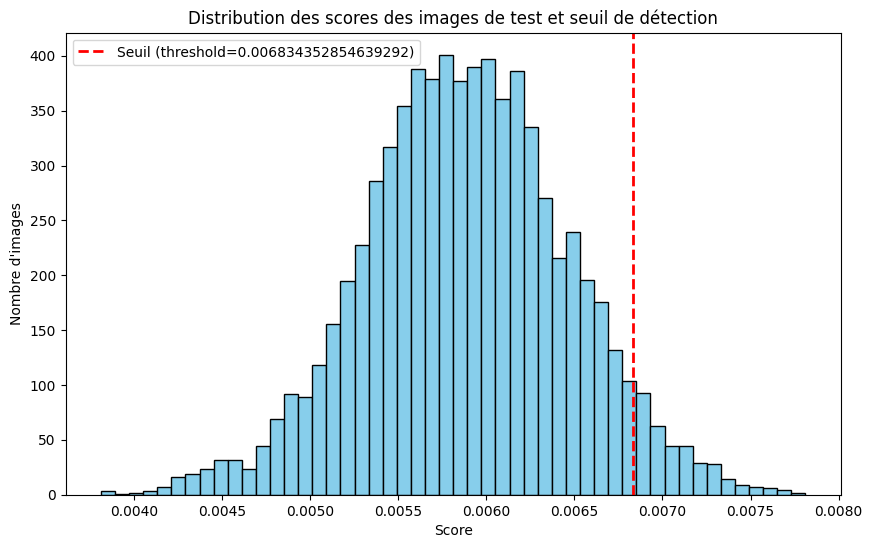

Indices des images anormales : [44, 45, 75, 171, 172, 173, 174, 340, 423, 424, 479, 480, 558, 559, 715, 716, 851, 852, 853, 854, 884, 885, 886, 887, 888, 889, 890, 916, 942, 977, 984, 985, 990, 1051, 1052, 1053, 1054, 1055, 1074, 1075, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1208, 1209, 1283, 1284, 1285, 1290, 1554, 1555, 1650, 1651, 1652, 1845, 1846, 1851, 1852, 1858, 1859, 1860, 1861, 1863, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2310, 2400, 2401, 2402, 2481, 2482, 2483, 2484, 2604, 2611, 2612, 2615, 2616, 2617, 2632, 2633, 2691, 2692, 2693, 2694, 2698, 2699, 2700, 2701, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2714, 2823, 2824, 2825, 2826, 3030, 3031, 3032, 3033, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3334, 3335, 3398, 3410, 3411, 3412, 3413, 3894, 3895, 3896, 3903, 3904, 3905, 3906, 3907, 3955, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 40

In [21]:
import torch
import matplotlib.pyplot as plt

# Fonction pour détecter les anomalies
def detect_anomalies(test_images_tensor, critic, threshold=None):
    critic.eval()  # Mode évaluation
    anomalies = []
    scores = []  # Liste pour enregistrer les scores

    with torch.no_grad():  # Désactivation des gradients
        for i, image in enumerate(test_images_tensor):
            image = image.unsqueeze(0).float().to(device)  # Ajout d'une dimension batch
            score = critic(image).mean().item()  # Calcul du score critique
            
            scores.append(score)  # Ajouter le score à la liste
            
            # Si le score dépasse le seuil, on l'ajoute aux anomalies
            if threshold is not None and score > threshold:
                anomalies.append(i)

    return anomalies, scores

# Charger les images de test dans test_images_tensor (supposé déjà préparé)
# Par exemple : test_images_tensor = ...

# Détecter les anomalies avec un seuil de 0.4 (si vous avez déjà un seuil défini)
threshold = 0.006834352854639292
anomalies, scores = detect_anomalies(test_images_tensor, critic, threshold)

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Seuil (threshold={threshold})')
plt.title('Distribution des scores des images de test et seuil de détection')
plt.xlabel('Score')
plt.ylabel('Nombre d\'images')
plt.legend()
plt.show()

# Afficher les indices des anomalies détectées
print(f"Indices des images anormales : {anomalies}")
print(f"Nombre d'anomalies détectées : {len(anomalies)}")

# Si vous souhaitez ajuster dynamiquement le seuil en fonction d'un percentile (par exemple le 95e percentile)
dynamic_threshold = torch.quantile(torch.tensor(scores), 0.95).item()
print(f"Seuil dynamique basé sur le 95e percentile : {dynamic_threshold}")

# Détecter à nouveau les anomalies avec ce seuil dynamique
anomalies_dynamic, _ = detect_anomalies(test_images_tensor, critic, threshold=dynamic_threshold)
print(f"Indices des anomalies détectées avec le seuil dynamique : {anomalies_dynamic}")


### Justification du choix du seuil pour la détection des anomalies

Dans ce projet, l'objectif est de détecter les anomalies dans un dataset d'images de tests en utilisant un modèle de critic. Le dataset **UCSD Ped1** présente un taux d'anomalies de **56%**, ce qui signifie que 56% des images sont considérées comme anormales.

Afin de refléter ce taux d'anomalies dans notre détection, nous avons choisi d'utiliser le **56e percentile des scores** comme seuil pour déterminer quelles images sont anormales. En d'autres termes, les images ayant un score au-dessus du **56e percentile** sont considérées comme des anomalies, ce qui correspond approximativement au taux réel d'anomalies du dataset.

Cette approche est basée sur l'idée que le modèle de critic attribue des scores plus élevés aux images anormales, et en fixant le seuil au **56e percentile**, nous nous assurons que la proportion d'anomalies détectées est proche de celle présente dans les données réelles.

### Pourquoi le 56e percentile ?
Le **56e percentile** est choisi pour que la détection des anomalies corresponde au taux d'anomalies réel dans les données (56%). Cela permet d'ajuster dynamiquement le seuil de détection en fonction de la distribution des scores des images de test, tout en respectant la proportion d'anomalies présente dans le dataset.

En utilisant cette méthode, nous obtenons un seuil qui permet de classer environ **56%** des imag


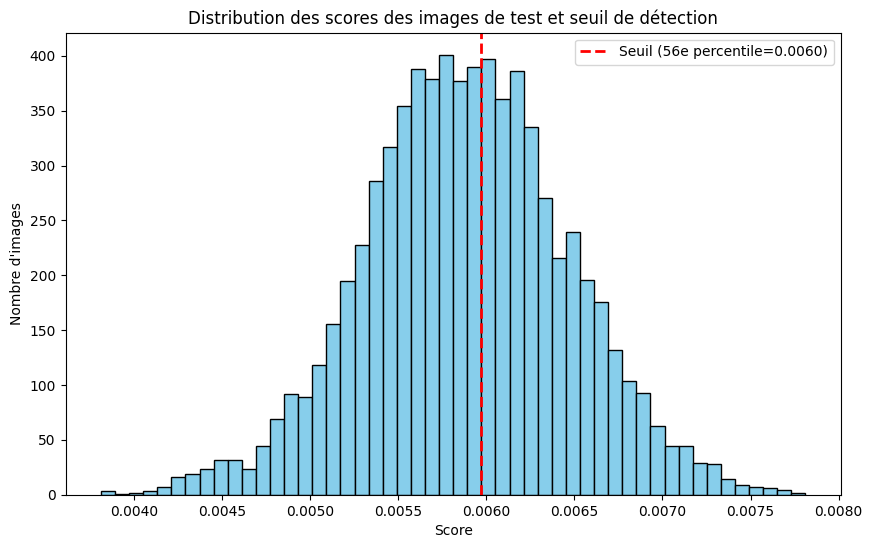

Indices des images anormales : [1, 14, 15, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 105, 106, 107, 108, 109, 121, 122, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 137, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 197, 198, 199, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 285, 286, 287, 288, 299, 305, 306, 307, 308, 320, 321, 322, 335, 336, 337, 338, 339, 340, 341, 342, 352, 353, 354, 355, 356, 357, 358, 376, 379, 380, 381, 382, 383, 384, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 440, 459, 460, 461, 462, 463, 464, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 497, 498, 499, 500, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 590, 592, 593, 594, 595, 596, 597, 598, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622,

In [22]:
import torch
import matplotlib.pyplot as plt

# Fonction pour détecter les anomalies
def detect_anomalies(test_images_tensor, critic, percentile=56):
    critic.eval()  # Mode évaluation
    anomalies = []
    scores = []  # Liste pour enregistrer les scores

    with torch.no_grad():  # Désactivation des gradients
        for i, image in enumerate(test_images_tensor):
            image = image.unsqueeze(0).float().to(device)  # Ajout d'une dimension batch
            score = critic(image).mean().item()  # Calcul du score critique
            scores.append(score)  # Ajouter le score à la liste

    # Calcul du seuil basé sur le 56e percentile des scores
    threshold = torch.quantile(torch.tensor(scores), percentile / 100).item()
    
    # Détection des anomalies
    for i, score in enumerate(scores):
        if score > threshold:  # Si le score dépasse le seuil
            anomalies.append(i)

    return anomalies, scores, threshold

# Charger les images de test dans test_images_tensor (supposé déjà préparé)
# Par exemple : test_images_tensor = ...

# Détecter les anomalies avec un seuil basé sur le 56e percentile
anomalies, scores, threshold = detect_anomalies(test_images_tensor, critic, percentile=56)

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Seuil (56e percentile={threshold:.4f})')
plt.title('Distribution des scores des images de test et seuil de détection')
plt.xlabel('Score')
plt.ylabel('Nombre d\'images')
plt.legend()
plt.show()

# Afficher les indices des anomalies détectées
print(f"Indices des images anormales : {anomalies}")
print(f"Nombre d'anomalies détectées : {len(anomalies)}")


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(detected_indices, adjusted_indices):
    """
    Calcule l'accuracy, la précision, le rappel et le F1 score pour la détection des anomalies.
    
    Args:
        detected_indices (list or numpy array): indices des anomalies détectées par le modèle.
        adjusted_indices (list or numpy array): indices des anomalies réelles (ground truth).
    
    Returns:
        dict: Un dictionnaire contenant l'accuracy, la précision, le rappel et le F1 score.
    """
    # Convertir les indices en sets pour faire la comparaison
    detected_set = set(detected_indices)
    adjusted_set = set(adjusted_indices)
    
    # True Positives (TP) : les indices détectés qui sont dans les indices réels
    true_positives = len(detected_set.intersection(adjusted_set))
    
    # False Positives (FP) : les indices détectés qui ne sont pas dans les indices réels
    false_positives = len(detected_set - adjusted_set)
    
    # False Negatives (FN) : les indices réels qui ne sont pas détectés par le modèle
    false_negatives = len(adjusted_set - detected_set)
    
    # True Negatives (TN) : les indices qui ne sont ni détectés ni réels (non utilisé ici mais pour la compréhension)
    # true_negatives = len(non_detected_set - adjusted_set)  # Peut être calculé si nécessaire, mais non utilisé ici.
    
    # Calcul de l'accuracy
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0.0
    
    # Calcul de la précision (precision)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    
    # Calcul du rappel (recall)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
    
    # Calcul du F1 score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


metrics = calculate_metrics(anomalies, adjusted_indices)

# Affichage des résultats
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1 Score: {metrics['f1_score']:.2f}")

Accuracy: 0.33
Precision: 0.57
Recall: 0.45
F1 Score: 0.50
